# Summary Statistics 

In [86]:
%matplotlib inline

import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from collections import Counter

sys.path.append(os.path.dirname(os.getcwd()))
from data import Sentence

## Loading the data


In [153]:
data = Sentence.load_epe(open('../data/cdt.epe')) + Sentence.load_epe(open('../data/cdd.epe'))

## All negation cues

In [158]:
cues = []
for sent in data:
    sent_cues = [(token, tag) for token, tag in zip(sent.tokens, sent.tags)
                 if tag in (Sentence.TAG_CUE, Sentence.TAG_AFFIX)]
    scope_size = sum([tag == Sentence.TAG_FALSE for tag in sent.tags])

    if len(sent_cues) > 1:
        cues.append(('/'.join([x for x, _ in sent_cues]), 'MUL', scope_size))
    elif sent_cues:
        if sent_cues[0][1] == Sentence.TAG_AFFIX:
            cues.append((sent_cues[0][0], 'AFFIX', scope_size))
        else:
            cues.append((sent_cues[0][0], 'CUE', scope_size))

cues = pd.DataFrame(cues, columns=['tokens', 'type', 'scope_size'])
cues = cues.groupby(['tokens', 'type']).agg({'mean', 'count'})
cues.columns = cues.columns.droplevel(level=0)
cues = cues.rename(columns={"mean": "mean_scope"})
cues = cues.sort_values(by=['count'], ascending=False)
cues = cues.round({"mean_scope": 2})
cues = cues.reset_index()
cues.head(10)


,tokens,type,count,mean_scope
0,not,CUE,385,8.64
1,no,CUE,184,7.54
2,n't,CUE,85,7.86
3,No,CUE,74,1.07
4,never,CUE,63,8.51
5,nothing,CUE,62,7.55
6,without,CUE,31,4.39
7,Not,CUE,13,5.77
8,impossible,AFFIX,11,8.09
9,Nothing,CUE,9,4.44


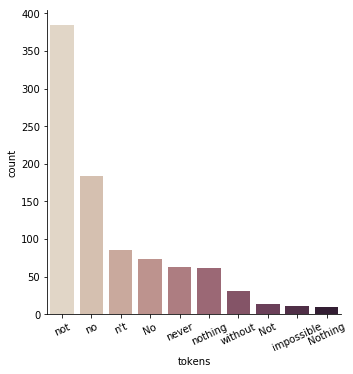

In [155]:
g = sns.catplot(x="tokens", y="count", data=cues[:10], kind="bar", palette="ch:.25")
g.set_xticklabels(rotation=25);

## Multi-token cues

In [156]:
mul_cues = cues[cues['type'] == 'MUL']
mul_cues.head(10)

,tokens,type,count,mean_scope
20,neither/nor,MUL,4,8.00
22,by/no/means,MUL,3,2.67
46,On/the/contrary,MUL,2,0.00
64,By/no/means,MUL,1,0.00
96,no/nor,MUL,1,8.00
125,Not/not,MUL,1,14.00
126,Not/for/the/world,MUL,1,0.00
133,rather/than,MUL,1,8.00
137,nothing/at/all,MUL,1,0.00
140,no/more,MUL,1,8.00


## Affix cues

In [159]:
affix_cues = cues[cues['type'] == 'AFFIX']
affix_cues.head(10)

,tokens,type,count,mean_scope
8,impossible,AFFIX,11,8.09
11,unable,AFFIX,8,7.25
13,unknown,AFFIX,7,2.86
14,unhappy,AFFIX,6,4.83
16,useless,AFFIX,4,7.25
18,unpleasant,AFFIX,4,5.25
19,unlikely,AFFIX,4,11.50
21,invisible,AFFIX,3,7.67
23,imprudent,AFFIX,3,5.33
24,motionless,AFFIX,3,3.00
